### Linear Regression 

In [1]:
import numpy as np
import pandas as pd
community_data = pd.read_csv("communities/communities.csv", usecols=(range(2,100)))
community_target = community_data['ViolentCrimesPerPop']
community_data = community_data.drop('ViolentCrimesPerPop',1)
community_data['OtherPerCap'] = community_data['OtherPerCap'].convert_objects(convert_numeric=True)
community_data['OtherPerCap'][130] = 0

In [2]:
summary_data = community_data.describe().T
summary_data

,count,mean,std,min,25%,50%,75%,max
population,1994,0.057593,0.126906,0,0.0100,0.020,0.0500,1
householdsize,1994,0.463395,0.163717,0,0.3500,0.440,0.5400,1
racepctblack,1994,0.179629,0.253442,0,0.0200,0.060,0.2300,1
racePctWhite,1994,0.753716,0.244039,0,0.6300,0.850,0.9400,1
racePctAsian,1994,0.153681,0.208877,0,0.0400,0.070,0.1700,1
racePctHisp,1994,0.144022,0.232492,0,0.0100,0.040,0.1600,1
agePct12t21,1994,0.424218,0.155196,0,0.3400,0.400,0.4700,1
agePct12t29,1994,0.493867,0.143564,0,0.4100,0.480,0.5400,1
agePct16t24,1994,0.336264,0.166505,0,0.2500,0.290,0.3600,1
agePct65up,1994,0.423164,0.179185,0,0.3000,0.420,0.5300,1


In [3]:
import regression
reload(regression)
weights = regression.standRegres(community_data, community_target)
weights

matrix([[ 0.11834646],
        [-0.02922577],
        [ 0.24092749],
        [-0.0016917 ],
        [ 0.01090845],
        [ 0.10294466],
        [ 0.19226098],
        [-0.08731771],
        [-0.26707723],
        [ 0.1629153 ],
        [-0.23340569],
        [ 0.04760611],
        [-0.178091  ],
        [-0.12977455],
        [ 0.04783344],
        [-0.13311942],
        [ 0.10066483],
        [ 0.03367824],
        [-0.07001099],
        [ 0.24780731],
        [ 0.09725633],
        [-0.30251297],
        [-0.02629637],
        [-0.03386553],
        [ 0.02482427],
        [ 0.04405201],
        [ 0.03347769],
        [ 0.08940556],
        [-0.14848215],
        [-0.10521207],
        [ 0.08373507],
        [ 0.1254445 ],
        [ 0.01415471],
        [ 0.27159735],
        [-0.03792884],
        [-0.00590797],
        [ 0.52852575],
        [ 0.2491119 ],
        [ 0.24410457],
        [-0.62003179],
        [-0.15990481],
        [ 0.06614387],
        [-0.26726612],
        [-0

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


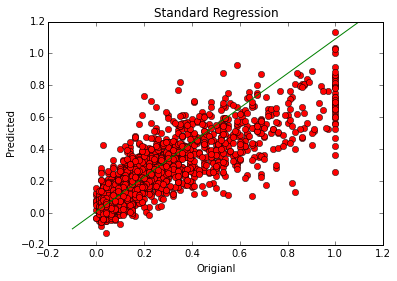

In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
import pylab as pl
%pylab inline
y_hat = np.dot(community_data, weights)
rmse = sqrt(mean_squared_error(community_target, y_hat))
pl.plot(community_target, y_hat, 'ro')
pl.plot([-0.1,1.1],[-0.1,1.2],'g-')
pl.xlabel('Origianl')
pl.ylabel('Predicted')
pl.title('Standard Regression')
pl.show()

In [5]:
from sklearn.cross_validation import KFold
k=KFold(len(community_data), n_folds=10)
error=[]
for train, test in k:
    weights = regression.standRegres(community_data.iloc[train,:], community_target[train])
    y_k_hat = np.dot(community_data.iloc[test,:], weights)
    k_rmse = sqrt(mean_squared_error(community_target[test], y_k_hat))
    error.append(k_rmse)
print("Standard Linear Regression")
print("RMSE on original data : %.4f" %rmse)    
print("RMSE on 10-Fold : %.4f"%np.mean(error))

Standard Linear Regression
RMSE on original data : 0.1292
RMSE on 10-Fold : 0.1362


In [6]:
LR = LinearRegression()
LR.fit(community_data, community_target)
y_hat = LR.predict(community_data)
rmse = sqrt(mean_squared_error(community_target, y_hat))
print("Scikit-Learn Regression")
print("RMSE on original data : %.4f" %rmse)    

Scikit-Learn Regression
RMSE on original data : 0.1289


In [7]:
def optimal_feature_perc(data,target,model):
    k=KFold(len(data), n_folds=5)
    best_perc = []
    for tr, te in k:
        error = []
        for i in range(10,90):
            fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
            X_train_fs = fs.fit_transform(data.iloc[tr,:], target.iloc[tr])
            fs_data = pd.DataFrame(X_train_fs)
            fs_data.columns = data.columns[fs.get_support()].values
            model.fit(fs_data, target.iloc[tr])
            test_data = data.loc[:,fs_data.columns]
            y_hat = model.predict(test_data.iloc[te,:])
            rmse = sqrt(mean_squared_error(target.iloc[te], y_hat))
            error.append(rmse)
    best_perc.append(error.index(min(error)))
    return(mean(best_perc))

result = optimal_feature_perc(community_data, community_target, LinearRegression())
print("My Function tells the optimal percentile is %d" %result)

My Function tells the optimal percentile is 57


In [8]:
from sklearn.cross_validation import train_test_split
train, test, tr_label, te_label = train_test_split(community_data, community_target, test_size=0.2, random_state=33)

def best_alpha(data, target, K = 10):
    best_error = []
    a = np.arange(0.1,1,0.1)
    for i in a:
        ridge = Ridge(fit_intercept=True, alpha=i)
        kf = KFold(len(data), n_folds=K)
        error = []
        for tr,te in kf:
            ridge.fit(data.iloc[tr,:],target.iloc[tr])
            y_hat = ridge.predict(data.iloc[te,:])
            rmse = sqrt(mean_squared_error(target.iloc[te], y_hat))
            error.append(rmse)
        best_error.append(np.mean(error))
    return(round(a[best_error.index(min(best_error))],3))
new_alpha = best_alpha(train, tr_label)
ridge = Ridge(fit_intercept=True, alpha=new_alpha)
ridge.fit(train,tr_label)
y_hat = ridge.predict(test)
rmse = sqrt(mean_squared_error(te_label, y_hat))
rmse

0.14334534122827458

In [9]:
def best_alpha(data, target, K = 10):
    best_error = []
    a = np.arange(0.1,1,0.1)
    for i in a:
        ridge = Lasso(fit_intercept=True, alpha=i)
        kf = KFold(len(data), n_folds=K)
        error = []
        for tr,te in kf:
            ridge.fit(data.iloc[tr,:],target.iloc[tr])
            y_hat = ridge.predict(data.iloc[te,:])
            rmse = sqrt(mean_squared_error(target.iloc[te], y_hat))
            error.append(rmse)
        best_error.append(np.mean(error))
    return(round(a[best_error.index(min(best_error))],3))
new_alpha = best_alpha(train, tr_label)
ridge = Lasso(fit_intercept=True, alpha=new_alpha)
ridge.fit(train,tr_label)
y_hat = ridge.predict(test)
rmse = sqrt(mean_squared_error(te_label, y_hat))
rmse

0.23994975434650598

### K- Means

In [13]:
import numpy as np
news_data = np.genfromtxt('newsgroups5/matrix.txt', delimiter=',', dtype = float)
news_data = news_data.T
target = np.genfromtxt('newsgroups5/classes.txt', delimiter=' ', skip_header=1, usecols=(1), dtype = int)
terms = np.genfromtxt('newsgroups5/terms.txt', dtype = None)
num_terms = len(news_data[0])
num_doc = len(news_data[:,0])
doc_freq = np.array((news_data!=0).sum(0))


In [14]:

def cosineDist(A, B):
    A_norm = np.array([linalg.norm(A[i]) for i in range(len(A))])
    B_norm = linalg.norm(B)
    sims = dot(A,B)/(A_norm * B_norm)
    return 1 - sims

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids

def kMeans(dataSet, k, distMeas=cosineDist, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) 
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]]
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

def displayCluster(centorids_tfidf,n):
    for i in range(len(centorids_tfidf)):
        print "\nCluster:",i
        displayTopTerms(terms,dict_DF,centorids_tfidf[i,:],n)
        

def displayTopTerms(terms,dict_DF,centorids_tfidf, n):
    temp = centorids_tfidf.A1
    ind = np.argpartition(temp, -n)[-n:]
    ind = ind[np.argsort(-temp[ind])]
    print "\tTerms\t\tDV\t\tCluster"
    for index in ind:
        print "%15s\t\t%.2f\t\t%.3f" %(terms[index],dict_DF[terms[index]],temp[index])

In [15]:
from sklearn.cross_validation import train_test_split
mat = np.ones(np.shape(news_data), dtype=float)*num_doc
idf = np.log2(np.divide(mat, doc_freq))
tfidf = news_data * idf
train, test, tr_label, te_label = train_test_split(tfidf,target,test_size=0.20,random_state=45)
print len(train[:,0])
print len(test[:,0])
print len(tr_label)
print len(te_label)

2000
500
2000
500


In [16]:

from numpy import *


In [17]:
centorids, clusters = kMeans(train, 5, cosineDist, randCent)

In [18]:
print(clusters)

[[ 1.          0.7101844 ]
 [ 2.          0.50393194]
 [ 1.          0.68630097]
 ..., 
 [ 2.          0.8102476 ]
 [ 1.          0.89066317]
 [ 2.          0.8251911 ]]


In [19]:
dict_DF = dict(zip(terms, np.array((news_data!=0).sum(0))))
displayCluster(centorids,5)


Cluster: 0
	Terms		DV		Cluster
             ax		15.00		41333.422
            max		19.00		2835.469
             pl		20.00		325.070
            giz		8.00		206.272
            bxn		8.00		138.129

Cluster: 1
	Terms		DV		Cluster
             cx		9.00		3.346
         window		381.00		3.057
           file		257.00		2.531
             uw		12.00		1.928
         driver		120.00		1.412

Cluster: 2
	Terms		DV		Cluster
            kei		297.00		5.892
           chip		238.00		4.210
        encrypt		234.00		4.117
        clipper		246.00		3.432
          secur		167.00		3.257

Cluster: 3
	Terms		DV		Cluster
           game		338.00		5.001
           team		242.00		3.872
           plai		266.00		3.186
         player		168.00		2.529
         hockei		203.00		2.524

Cluster: 4
	Terms		DV		Cluster
            god		312.00		7.751
      christian		251.00		4.974
       homosexu		47.00		3.846
            sin		103.00		3.803
         church		136.00		3.536


In [20]:
train_clust = ravel(clusters.T[0])
train_clust = train_clust.astype(int)
from sklearn.metrics import completeness_score, homogeneity_score
print('Completeness: %.5f' %completeness_score(tr_label,train_clust))
print('Homogeneity: %.5f' %homogeneity_score(tr_label,train_clust))

Completeness: 0.83880
Homogeneity: 0.70700
